<a href="https://colab.research.google.com/github/UniRPetersen/sdsphd21PhD_URP/blob/main/Portfolio_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portfolio assignment - Uni Reinert Petersen

#Assignment 1 - clustering



I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [10]:
#Importing essentials
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [11]:
#read csv and converts "." to "NaN"
df=pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv",na_values=["."])

In [12]:
#subsetting df
df_sub1 = df.iloc[:, [0, 39, 40, 41, 42, 43, 44, 45, 46 , 47, 48, 90]]

In [13]:
#select a subset of data with questions on beliefs, and the gender/age of respondents.
df_sub2 = df_sub1.rename(columns={'v7': 'gender', 'v170': 'god', 'v171': 'life_after', 'v172': 'hell', 'v173': 'paradise', 'v174': 'sinn', 

                   'v175': 'telepathy', 'v176': 'reincarnation', 'v179': 'support_strength', 'v180': 'prays', 'v182': 'lucky_amul', 'bald': 'age'})

df_sub2.groupby(["gender"]).mean()
df_sub3 = df_sub2.dropna()

#inserting new column called "id"
df_sub3.insert(0, 'id', range(1, 1+len(df_sub3)))
df_sub3


id  gender  god  life_after  ...  support_strength  prays  lucky_amul  age
0       1       2  2.0         2.0  ...               2.0    2.0         2.0   48
1       2       1  1.0         1.0  ...               1.0    1.0         2.0   30
2       3       1  1.0         2.0  ...               1.0    1.0         2.0   57
5       4       2  2.0         2.0  ...               2.0    2.0         2.0   21
6       5       2  1.0         1.0  ...               2.0    2.0         2.0   60
...   ...     ...  ...         ...  ...               ...    ...         ...  ...
1017  578       2  2.0         2.0  ...               2.0    1.0         1.0   33
1018  579       1  1.0         2.0  ...               2.0    2.0         2.0   47
1019  580       1  2.0         2.0  ...               2.0    2.0         2.0   54
1020  581       1  2.0         2.0  ...               2.0    2.0         2.0   47
1021  582       1  1.0         1.0  ...               1.0    1.0         1.0   26

[582 rows x 13 columns]

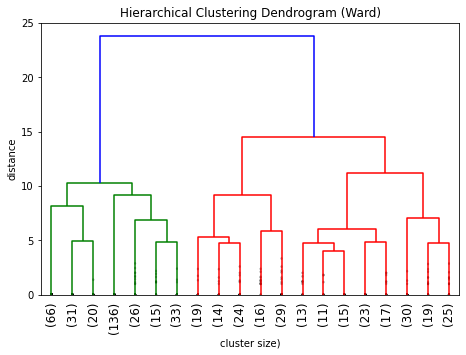

In [14]:
X = df_sub3[['god', 'life_after', 'hell', 'paradise', 'sinn', 'telepathy', 'reincarnation', 'support_strength', 'prays', 'lucky_amul']]

#X_1 = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]

not_cluster_set=df_sub3[['gender', 'age',]]

linked = linkage(X, 'ward')



figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [15]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df_sub3['cluster'+k]=labels

Cluster count- 2 |  db score- 1.53 |  ch score -  225.36 |  ss score -  0.32
Cluster count- 3 |  db score- 1.69 |  ch score -  179.87 |  ss score -  0.33
Cluster count- 4 |  db score- 1.53 |  ch score -  154.73 |  ss score -  0.31
Cluster count- 5 |  db score- 1.55 |  ch score -  142.61 |  ss score -  0.29
Cluster count- 6 |  db score- 1.57 |  ch score -  134.71 |  ss score -  0.35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Cluster count- 7 |  db score- 1.6 |  ch score -  132.79 |  ss score -  0.36
Cluster count- 8 |  db score- 1.51 |  ch score -  130.26 |  ss score -  0.41
Cluster count- 9 |  db score- 1.54 |  ch score -  126.49 |  ss score -  0.42
Cluster count- 10 |  db score- 1.44 |  ch score -  124.37 |  ss score -  0.44


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta



... and the results for 2 clusters are!
cluster2              0      1
gender             1.58   1.37
god                1.11   1.62
life_after         1.29   1.99
hell               1.82   2.00
paradise           1.67   1.98
sinn               1.62   1.99
telepathy          1.48   1.84
reincarnation      1.65   1.96
support_strength   1.38   1.99
prays              1.20   1.79
lucky_amul         1.78   1.91
age               44.60  45.06

And the size of the clusters if there are 2 clusters are
cluster2
0    255
1    327
Name: id, dtype: int64

And if we have 2 clusters, the dendrogram looks like


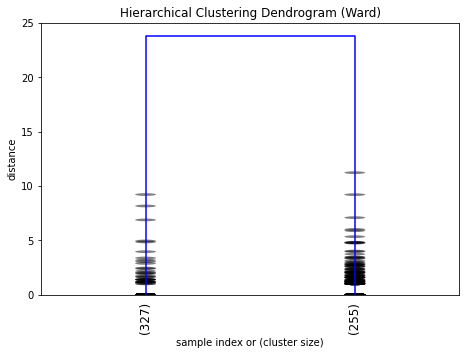



... and the results for 3 clusters are!
cluster3              0      1      2
gender             1.52   1.37   1.67
god                1.01   1.62   1.26
life_after         1.47   1.99   1.01
hell               1.76   2.00   1.90
paradise           1.61   1.98   1.76
sinn               1.46   1.99   1.84
telepathy          1.72   1.84   1.13
reincarnation      1.95   1.96   1.20
support_strength   1.20   1.99   1.64
prays              1.08   1.79   1.38
lucky_amul         1.86   1.91   1.66
age               49.46  45.06  37.31

And the size of the clusters if there are 3 clusters are
cluster3
0    153
1    327
2    102
Name: id, dtype: int64

And if we have 3 clusters, the dendrogram looks like


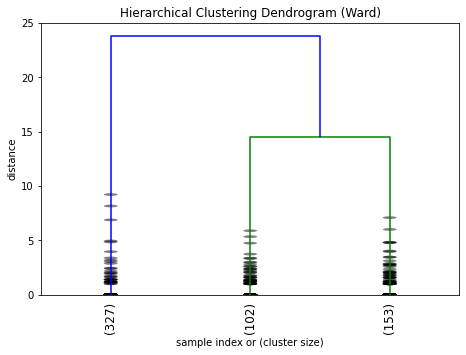



... and the results for 4 clusters are!
cluster4              0      1      2      3
gender             1.37   1.54   1.67   1.49
god                1.62   1.00   1.26   1.01
life_after         1.99   1.00   1.01   1.91
hell               2.00   1.54   1.90   1.96
paradise           1.98   1.26   1.76   1.94
sinn               1.99   1.32   1.84   1.59
telepathy          1.84   1.86   1.13   1.58
reincarnation      1.96   1.91   1.20   2.00
support_strength   1.99   1.16   1.64   1.24
prays              1.79   1.04   1.38   1.13
lucky_amul         1.91   1.89   1.66   1.84
age               45.06  47.12  37.31  51.66

And the size of the clusters if there are 4 clusters are
cluster4
0    327
1     74
2    102
3     79
Name: id, dtype: int64

And if we have 4 clusters, the dendrogram looks like


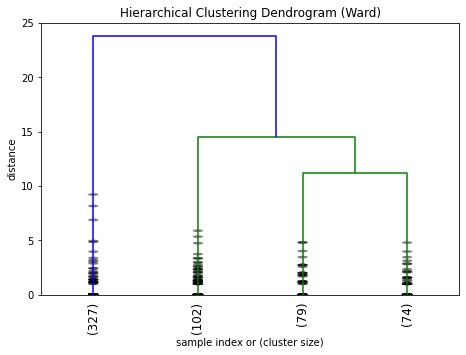



... and the results for 5 clusters are!
cluster5              0      1      2      3      4
gender             1.36   1.39   1.67   1.49   1.54
god                1.87   1.17   1.26   1.01   1.00
life_after         1.98   2.00   1.01   1.91   1.00
hell               2.00   2.00   1.90   1.96   1.54
paradise           2.00   1.95   1.76   1.94   1.26
sinn               1.98   2.00   1.84   1.59   1.32
telepathy          1.75   2.00   1.13   1.58   1.86
reincarnation      1.94   2.00   1.20   2.00   1.91
support_strength   1.99   1.99   1.64   1.24   1.16
prays              1.92   1.56   1.38   1.13   1.04
lucky_amul         1.87   2.00   1.66   1.84   1.89
age               42.59  49.49  37.31  51.66  47.12

And the size of the clusters if there are 5 clusters are
cluster5
0    210
1    117
2    102
3     79
4     74
Name: id, dtype: int64

And if we have 5 clusters, the dendrogram looks like


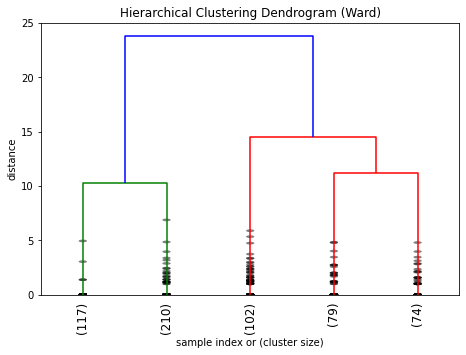

In [16]:
for i in range(2,6):

    i=str(i)

    X_1=df_sub3[['cluster'+i,'gender','god', 'life_after', 'hell', 'paradise', 'sinn', 'telepathy', 'reincarnation', 'support_strength', 'prays', 'lucky_amul', 'age']]

    stuff=X_1.groupby(['cluster'+i]).mean()

    trans_stuff=stuff.T

    ts=round(trans_stuff,2)

    print("")

    print("")

    print('... and the results for' ,i, 'clusters are!')  

    print(ts)

    print("")

    count=df_sub3.groupby(['cluster'+i])['id'].count()

    print("And the size of the clusters if there are",i, "clusters are")

    print(count)

    print("")

    print("And if we have",i,"clusters, the dendrogram looks like")

    i=int(i)

    figure = plt.figure(figsize=(7.5, 5))

    dendrogram(

            linked,

        truncate_mode='lastp',  # show only the last p merged clusters

        p=i,  # show only the last p merged clusters

        leaf_rotation=90.,

        leaf_font_size=12.,

        show_contracted=True,  # to get a distribution impression in truncated branches

    )

    plt.title('Hierarchical Clustering Dendrogram (Ward)')

    plt.xlabel('sample index or (cluster size)')

    plt.ylabel('distance')

    plt.show()

#Assignment 2 - Supervised Machine Learning: Employee turnover

## Supervised Machine Learning: Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression

Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to get dummies for categorical variables.

In [52]:
# loading essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set(style="darkgrid", color_codes=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [53]:
#importing dataframe from csv file
emp_df = pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/turnover.csv")
emp_df

satisfaction  evaluation  ...  department  salary
0              0.38        0.53  ...       sales     low
1              0.80        0.86  ...       sales  medium
2              0.11        0.88  ...       sales  medium
3              0.72        0.87  ...       sales     low
4              0.37        0.52  ...       sales     low
...             ...         ...  ...         ...     ...
14994          0.40        0.57  ...     support     low
14995          0.37        0.48  ...     support     low
14996          0.37        0.53  ...     support     low
14997          0.11        0.96  ...     support     low
14998          0.37        0.52  ...     support     low

[14999 rows x 10 columns]

In [54]:
#exploring df
emp_df.describe()


satisfaction    evaluation  ...         churn     promotion
count  14999.000000  14999.000000  ...  14999.000000  14999.000000
mean       0.612834      0.716102  ...      0.238083      0.021268
std        0.248631      0.171169  ...      0.425924      0.144281
min        0.090000      0.360000  ...      0.000000      0.000000
25%        0.440000      0.560000  ...      0.000000      0.000000
50%        0.640000      0.720000  ...      0.000000      0.000000
75%        0.820000      0.870000  ...      0.000000      0.000000
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 8 columns]

In [55]:
#Creating new df without "churn" column
emp1_df = emp_df.drop("churn", axis=1)
emp1_df

satisfaction  evaluation  ...  department  salary
0              0.38        0.53  ...       sales     low
1              0.80        0.86  ...       sales  medium
2              0.11        0.88  ...       sales  medium
3              0.72        0.87  ...       sales     low
4              0.37        0.52  ...       sales     low
...             ...         ...  ...         ...     ...
14994          0.40        0.57  ...     support     low
14995          0.37        0.48  ...     support     low
14996          0.37        0.53  ...     support     low
14997          0.11        0.96  ...     support     low
14998          0.37        0.52  ...     support     low

[14999 rows x 9 columns]

In [56]:
#creating dummy variables for "departments" and "salary"
emp1_df_dum1 = pd.get_dummies(emp1_df["department"])

emp1_df_dum2 = pd.get_dummies(emp1_df["salary"])


In [57]:
#removing original "department" and "salary" columns and replacing with new dummy variable columns
emp2_df = emp1_df.drop(["department", "salary"], axis=1)

emp2_df = pd.concat([emp2_df, emp1_df_dum1], axis=1)

X = pd.concat([emp2_df, emp1_df_dum2], axis=1)
X

satisfaction  evaluation  number_of_projects  ...  high  low  medium
0              0.38        0.53                   2  ...     0    1       0
1              0.80        0.86                   5  ...     0    0       1
2              0.11        0.88                   7  ...     0    0       1
3              0.72        0.87                   5  ...     0    1       0
4              0.37        0.52                   2  ...     0    1       0
...             ...         ...                 ...  ...   ...  ...     ...
14994          0.40        0.57                   2  ...     0    1       0
14995          0.37        0.48                   2  ...     0    1       0
14996          0.37        0.53                   2  ...     0    1       0
14997          0.11        0.96                   6  ...     0    1       0
14998          0.37        0.52                   2  ...     0    1       0

[14999 rows x 20 columns]

In [58]:
#scaling values
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [59]:
#this is new: we encode a categorical variable.
y = emp_df.iloc[:, 6]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)



In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial") # since we have 2 classes
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [62]:
model.score(X_test, y_test)

0.783

We can use the LabelEncoder to obtain the initial labels of the penguins to see how well the model performed

In [63]:
true_churn = labelencoder_y.inverse_transform(y_test)

predicted_churn = labelencoder_y.inverse_transform(model.predict(X_test))

In [64]:
churn_df = pd.DataFrame({'true_churn': true_churn, 'predicted_churn': predicted_churn}) 
#churn_df

print(classification_report(true_churn,predicted_churn, labels=labelencoder_y.classes_))

pd.crosstab(churn_df.true_churn, churn_df.predicted_churn)


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2284
           1       0.58      0.33      0.42       716

    accuracy                           0.78      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



predicted_churn     0    1
true_churn                
0                2116  168
1                 483  233

The confusion table shows that the model predicted about one third of the resignations correctly, while the remaining two thirds were wrongly predicted. 

In an effort to improve this prediction, I try out the XGboost algorithm. 

In [66]:
from xgboost import XGBClassifier

In [69]:
# fit model on training data
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train)

XGBClassifier()

In [70]:
true_churn2 = labelencoder_y.inverse_transform(y_test)

predicted_churn2 = labelencoder_y.inverse_transform(model.predict(X_test))

In [71]:
churn_df2 = pd.DataFrame({'true_churn2': true_churn2, 'predicted_churn2': predicted_churn2})

In [72]:
print(classification_report(true_churn2,predicted_churn2, labels=labelencoder_y.classes_))

pd.crosstab(churn_df2.true_churn2, churn_df2.predicted_churn2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2284
           1       0.98      0.91      0.94       716

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



predicted_churn2     0    1
true_churn2                
0                 2268   16
1                   68  648

The XGboost algorithm was much better at predicting  quitting employees. 

#Regression

In [81]:
emp_df.head()

satisfaction  evaluation  number_of_projects  ...  promotion  department  salary
0          0.38        0.53                   2  ...          0       sales     low
1          0.80        0.86                   5  ...          0       sales  medium
2          0.11        0.88                   7  ...          0       sales  medium
3          0.72        0.87                   5  ...          0       sales     low
4          0.37        0.52                   2  ...          0       sales     low

[5 rows x 10 columns]

In [82]:
y = emp_df['average_montly_hours']

In [83]:
X_dum = emp_df.department.str.get_dummies()

In [84]:
X = pd.concat([emp_df.iloc[:,[0,1]], X_dum], axis=1)

In [85]:
X.iloc[:,0:2] = StandardScaler().fit_transform(X.iloc[:,0:2])

In [86]:
X.head()

satisfaction  evaluation  IT  RandD  ...  product_mng  sales  support  technical
0     -0.936495   -1.087275   0      0  ...            0      1        0          0
1      0.752814    0.840707   0      0  ...            0      1        0          0
2     -2.022479    0.957554   0      0  ...            0      1        0          0
3      0.431041    0.899131   0      0  ...            0      1        0          0
4     -0.976716   -1.145699   0      0  ...            0      1        0          0

[5 rows x 12 columns]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [94]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [95]:
model_ols = LinearRegression()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

In [96]:
model_ols.fit(X_train, y_train)

LinearRegression()

In [97]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
model_xgb.fit(X_train, y_train)

[12:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [100]:
model_ols.score(X_test, y_test)

0.10095578012997697

In [101]:
model_rf.score(X_test, y_test)

0.24423867966933777

In [102]:
model_xgb.score(X_test, y_test)

0.28344123880192007

In [103]:
y_pred_ols = model_ols.predict(X_test)

In [104]:
y_pred_rf = model_rf.predict(X_test)

In [105]:
y_pred_xgb = model_xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


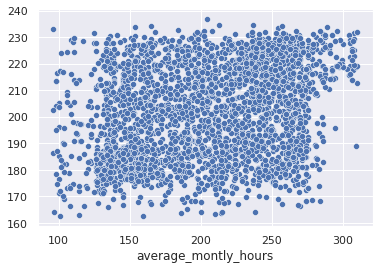

In [106]:
sns.scatterplot(y_test, y_pred_ols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


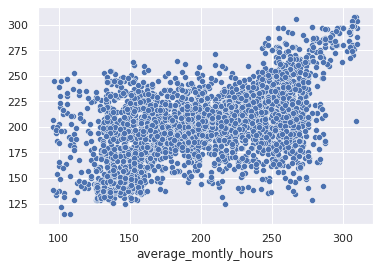

In [107]:
sns.scatterplot(y_test, y_pred_rf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


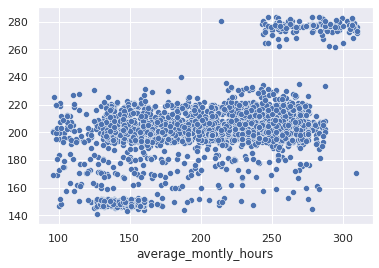

In [108]:
sns.scatterplot(y_test, y_pred_xgb)

In [109]:
print(model_xgb.predict(X))

[148.43231 219.95314 277.05505 ... 148.2136  273.1726  148.2136 ]


In [110]:
print("MSE for XGB " + str(mean_squared_error(y_pred_xgb, y_test)))

print("MSE for OLS " + str(mean_squared_error(y_pred_ols, y_test)))

print("MSE for RF " + str(mean_squared_error(y_pred_rf, y_test)))

MSE for XGB 1775.3621312113407
MSE for OLS 2227.4922151157116
MSE for RF 1872.4912749736632


# Assignment 3.a - Geospatial analysis

Requirement: Provide solutions for the geospatial data exercise and the network analysis exercise.

Geospatial data: Map data of your choice
Try to go here: https://ec.europa.eu/eurostat/data/database

And look for statistics that are on NUTS level 2

Then go grab this data: https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

In [111]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)
!pip install adjustText # Adjusting text in maps

In [112]:
#importing packages
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [113]:
!wget "https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip"
!unzip NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

--2021-12-10 12:40:21--  https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip [following]
--2021-12-10 12:40:22--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159016 (155K) [application/zip]
Saving to: ‘NUTS_RG_20M_2021_3035_LEVL_2.shp.zip.1’

NUTS_RG_20M_2021_30 100%[===================>] 155.29K  --.-KB/s    in 0.02s   


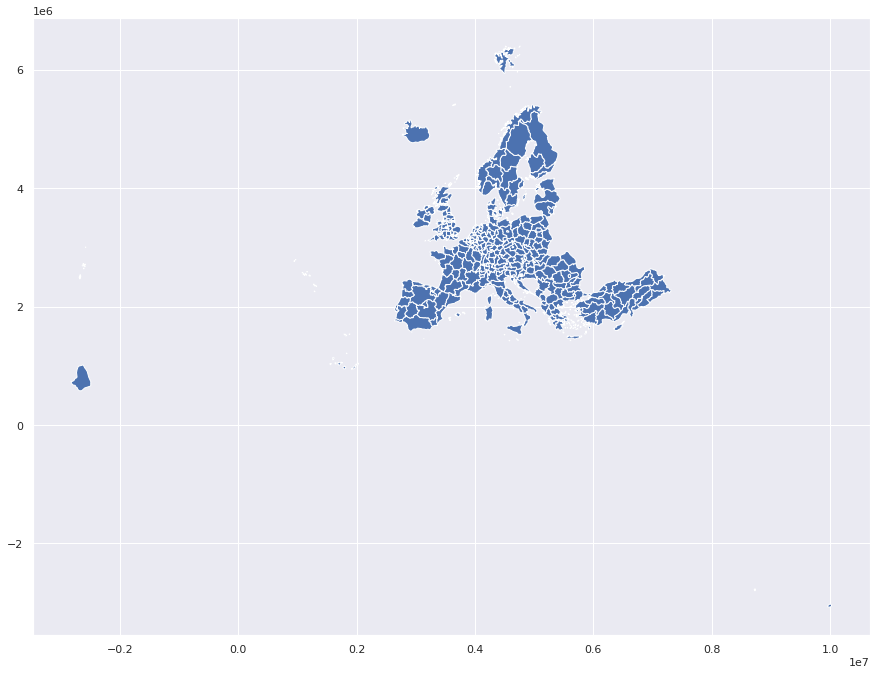

In [114]:
nuts = gdp.read_file("NUTS_RG_20M_2021_3035_LEVL_2.shp")
nuts.plot(figsize=(15,15))

In [115]:
nuts

NUTS_ID  LEVL_CODE  ...   FID                                           geometry
0      CZ05          2  ...  CZ05  POLYGON ((4710986.851 3088955.848, 4729795.896...
1      CZ06          2  ...  CZ06  POLYGON ((4715869.727 2986862.871, 4782782.205...
2      CZ07          2  ...  CZ07  POLYGON ((4929608.184 2955255.716, 4924768.599...
3      CZ08          2  ...  CZ08  POLYGON ((4895030.487 3026304.289, 4917489.492...
4      DE11          2  ...  DE11  POLYGON ((4327060.365 2936754.230, 4329577.592...
..      ...        ...  ...   ...                                                ...
329    NO08          2  ...  NO08  POLYGON ((4226322.205 4220417.267, 4276802.361...
330    NO09          2  ...  NO09  POLYGON ((4339135.109 4065666.746, 4342546.778...
331    NO0A          2  ...  NO0A  MULTIPOLYGON (((4258515.326 4480648.690, 42645...
332    NO07          2  ...  NO07  MULTIPOLYGON (((5073773.420 5207018.495, 50670...
333    NO0B          2  ...  NO0B  MULTIPOLYGON (((4754167.335 6382461.408, 47465...

[334 rows x 10 columns]

Try to do something cool with the data and map some stuff. Remember; the layer is NUTS level 2, so you need data that fits. Furthermore, you might want to consider a subset of the areas. Country name is specified in the column: "CNTR_CODE" and the "key" for most statistics in eurostat is "NUTS_NAME"

In [116]:
#subsetting to denmark, norway, sweden, finland
nuts1 = nuts.loc[nuts['CNTR_CODE'].isin(["DK", "FI", "NO", "SE"])]


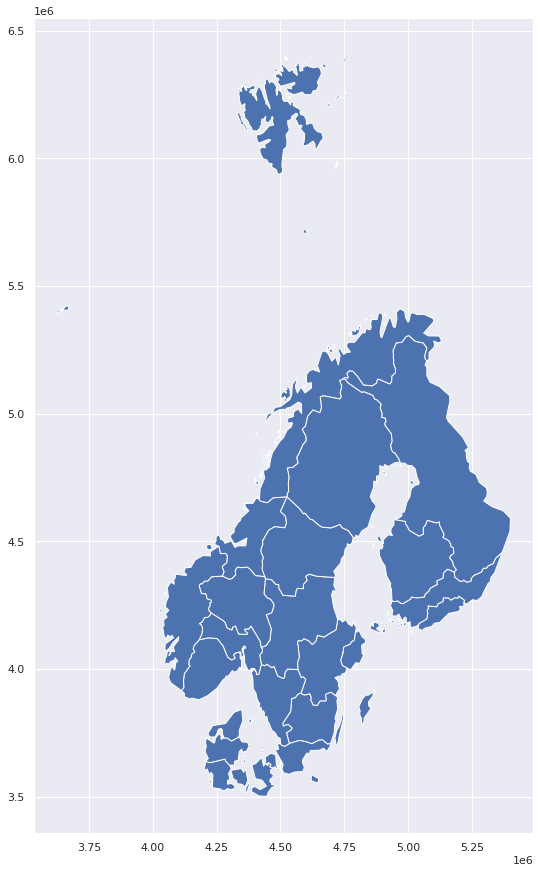

In [117]:
#plot new region
nuts1.plot(figsize=(15,15))

In [119]:
#importing csv file of % of population with tertiary education
education_df = pd.read_csv("tgs00109_page_linear.csv")
education_df.head()


DATAFLOW        LAST UPDATE freq  ... TIME_PERIOD OBS_VALUE OBS_FLAG
0  ESTAT:TGS00109(1.0)  18/10/21 23:00:00    A  ...        2009      15.1      NaN
1  ESTAT:TGS00109(1.0)  18/10/21 23:00:00    A  ...        2010      14.8      NaN
2  ESTAT:TGS00109(1.0)  18/10/21 23:00:00    A  ...        2011      14.8      NaN
3  ESTAT:TGS00109(1.0)  18/10/21 23:00:00    A  ...        2012      13.9      NaN
4  ESTAT:TGS00109(1.0)  18/10/21 23:00:00    A  ...        2013      15.8      NaN

[5 rows x 11 columns]

In [121]:
#subestting to one year and only the selected regions
edu_north = education_df.loc[education_df["geo"].isin(nuts1["NUTS_ID"])]

edu_north = edu_north.loc[edu_north["TIME_PERIOD"].isin([2020])]

edu_north



DATAFLOW        LAST UPDATE  ... OBS_VALUE OBS_FLAG
971   ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      53.1      NaN
983   ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      30.4      NaN
995   ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      33.5      NaN
1007  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      38.9      NaN
1019  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      32.0      NaN
1427  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      45.9      NaN
1439  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      54.9      NaN
1451  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      43.5      NaN
1463  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      42.0      NaN
1475  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      41.6      NaN
2426  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      35.5      NaN
2474  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      46.0      NaN
2486  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      40.4      NaN
2906  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      53.7      NaN
2918  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      42.8      NaN
2930  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      37.2      NaN
2942  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      45.4      NaN
2954  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      43.4      NaN
2966  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      35.3      NaN
2978  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      37.0      NaN
2990  ESTAT:TGS00109(1.0)  18/10/21 23:00:00  ...      40.0      NaN

[21 rows x 11 columns]

In [122]:
nuts1.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

In [123]:
#merging nuts shape file with data about tertieary education %
data_merge = nuts1.merge(edu_north, left_on='NUTS_ID', right_on="geo", how='left', validate="one_to_one")
data_merge.head()

NUTS_ID  LEVL_CODE CNTR_CODE  ... TIME_PERIOD OBS_VALUE  OBS_FLAG
0    DK01          2        DK  ...      2020.0      53.1       NaN
1    DK03          2        DK  ...      2020.0      33.5       NaN
2    DK04          2        DK  ...      2020.0      38.9       NaN
3    DK05          2        DK  ...      2020.0      32.0       NaN
4    DK02          2        DK  ...      2020.0      30.4       NaN

[5 rows x 21 columns]

Text(227.19197157735704, 0.5, 'Latitude')

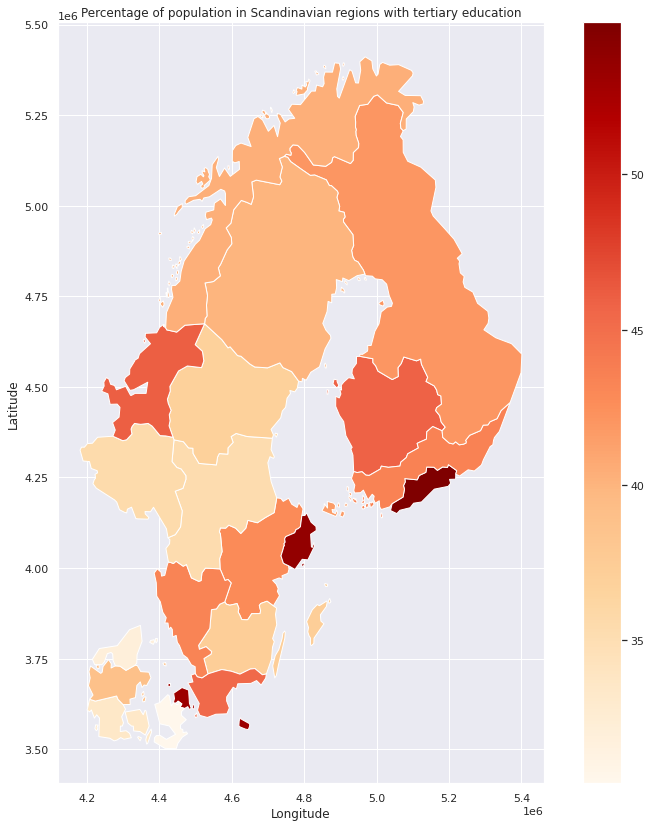

In [124]:

data_merge.plot(column="OBS_VALUE", legend="True", figsize=(14,14), cmap='OrRd')
plt.title('Percentage of population in Scandinavian regions with tertiary education')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

The map shows the percentage of people in each NUTS level 2 region between age 25-64 that have completed tertiary studies, such as university or higher technical education etc. It shows that the regions around Copenhagen, Stockholm and Helsinki have the highest share of highly educated people.

# Assignment 3.b Network analysis: Directed Networks: Friends & Foes at Work (Case Study)

## Introduction and example code

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [125]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 18.5 MB 29.5 MB/s 
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.2 which is incompatible.
     |████████████████████████████████| 10.7 MB 2.7 MB/s 


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
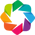

In [127]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [128]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [129]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [130]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [131]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [132]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [133]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [134]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [135]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [136]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653237

In [137]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.036510830626211646

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [138]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

## task 1
Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?

In [139]:
nx.overall_reciprocity(G_advice)

0.3923766816143498

In [140]:
nx.overall_reciprocity(G_work)

1.0

The reciprocity of advice is approximately 40%, which makes sense since clever people are frequently asked about advice, while they do not need to ask others for advice as frequently. They are more awesome than the rest. 

Reciprocity is 100% on work, since if two people have worked together, then both have worked with one another. It is binary.



##task 2
Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)

In [141]:
import community.community_louvain as community_louvain


In [142]:
print(nx.info(G_advice))

DiGraph with 71 nodes and 892 edges


In [143]:
# Create and save a layout.
G_layout_advice = nx.layout.fruchterman_reingold_layout(G_advice) 

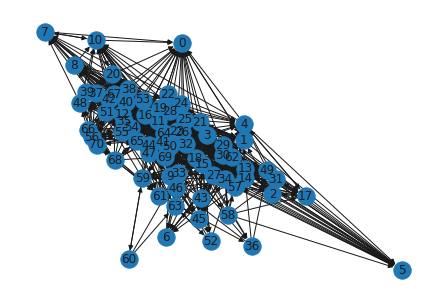

In [144]:
# We use the standard networkx plot, and pass the layout.
nx.draw(G_advice, pos = G_layout_advice, with_labels=True)

In [145]:
G_advice2 = G_advice.to_undirected()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
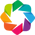

In [146]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))


In [147]:
g_plot = hv.Graph.from_networkx(G_advice2, G_layout_advice).opts(tools=['hover'])

In [148]:
# Find the optimal partition with the Louvain algorithm.
com = community_louvain.best_partition(G_advice2)

In [149]:
# The number of communities detected
max(com.values())

2

In [150]:
nx.set_node_attributes(G_advice2, com, 'community')

g_plot = hv.Graph.from_networkx(G_advice2, G_layout_advice).opts(tools=['hover'],
                                                  node_size='cent_degree',
                                                  edge_alpha=0.25,
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [151]:
# Create and save a layout.
G_layout_friendship = nx.layout.fruchterman_reingold_layout(G_friendship) 

In [152]:
G_friendship_2 = G_friendship.to_undirected()

In [153]:
nx.set_node_attributes(G_friendship_2, com, 'community')

g_plot = hv.Graph.from_networkx(G_friendship_2, G_layout_friendship).opts(tools=['hover'],
                                                  node_size='cent_degree',
                                                  edge_alpha=0.25,
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

# Assignment 4 - Thursday: NLP

![](https://sds-aau.github.io/SDS-2021/images/elon.jpg)

The site [https://faketrump.ai/](https://faketrump.ai/) **WAS** an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset. Also Tump is gone...
Therefore: Elon it is!

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that projects, Roman decided to retrain GPT-2 to generate new fake Elon tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

Here some examples:

> We’ll only do one or two at a time. @S@Erdayastronaut @SpaceX SN4 with F9 engine is ~$3M in cost &amp; Starship is ~$100M in production. Only ~$100M with F9 booster._Padival @Tesla Will update with any situation. It was meant to be obvious.

> @Erdayastronaut @SpaceX SN4 with F9 engine is ~$3M in cost &amp; Starship is ~$100M in production. Only ~$100M with F9 booster.

> If you buy a car, you will get a self-driving car that works best on any climate, no matter how smoggy. We’re fixing that.

 The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/master/M3/assignments/find_elon.gz) and has the following format: (Boolean = 1 if real one and 0 if fake)

| tweet  | real    |
|--------|---------|
| string | boolean |

There are 1577 real Elon tweets and 1577 fake ones.

Your job is to train and apply a supervised machine learning model to detect fake Elon tweets!

In [192]:
!pip -q install eli5 #installing a great package for explaining ML models
import eli5

In [194]:
import pandas as pd
import numpy as np

In [195]:
data = pd.read_csv("https://github.com/SDS-AAU/SDS-master/raw/master/M3/assignments/find_elon.gz", sep=",")

In [196]:
# some basic text cleaning, removing HTML fragments (only a problem here)

import re

pattern = re.compile('<br /><br />')

print(data['0'].iloc[3])
print(pattern.subn(' ', data['0'].iloc[3])[0])

@LarryKellogg @arctechinc The Tesla FSD computer started shipping in volume in Q2 2019. 2020 cars should all have FSD computers, whether or not  ordered as an option.
@LarryKellogg @arctechinc The Tesla FSD computer started shipping in volume in Q2 2019. 2020 cars should all have FSD computers, whether or not  ordered as an option.


In [197]:
data.head()



0  1
0     @WhatsupFranks @lexfridman NPCs all the way up  1
1  We’ll only do one or two at a time. @S_Padival...  0
2  @Erdayastronaut @SpaceX SN4 with F9 engine is ...  0
3  @LarryKellogg @arctechinc The Tesla FSD comput...  1
4  @brainwipe There would def be millions of agen...  1

In [198]:
data 

0  1
0        @WhatsupFranks @lexfridman NPCs all the way up  1
1     We’ll only do one or two at a time. @S_Padival...  0
2     @Erdayastronaut @SpaceX SN4 with F9 engine is ...  0
3     @LarryKellogg @arctechinc The Tesla FSD comput...  1
4     @brainwipe There would def be millions of agen...  1
...                                                 ... ..
3149  In fact, the tunnel will not be there for seve...  0
3150  Tesla dual motor means there is a motor in fro...  1
3151    Hey babe, fancy a hot date …? 😉 @4thFromOurStar  1
3152  If you buy a car, you will get a self-driving ...  0
3153                    @richardreinariv He has no clue  1

[3154 rows x 2 columns]

In [199]:
#application of the cleaning mask to everthing
data['0'] = data['0'].apply(lambda text: pattern.subn(' ', text)[0])
data['0'] = data['0'].apply(lambda text: pattern.subn(' ', text)[0])

In [200]:
data

0  1
0        @WhatsupFranks @lexfridman NPCs all the way up  1
1     We’ll only do one or two at a time. @S_Padival...  0
2     @Erdayastronaut @SpaceX SN4 with F9 engine is ...  0
3     @LarryKellogg @arctechinc The Tesla FSD comput...  1
4     @brainwipe There would def be millions of agen...  1
...                                                 ... ..
3149  In fact, the tunnel will not be there for seve...  0
3150  Tesla dual motor means there is a motor in fro...  1
3151    Hey babe, fancy a hot date …? 😉 @4thFromOurStar  1
3152  If you buy a car, you will get a self-driving ...  0
3153                    @richardreinariv He has no clue  1

[3154 rows x 2 columns]

## Approach 1 - Sklearn
If you don't want to deal with language or much code you can just do that

In [201]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [202]:
# define in and outputs

X = data['0'].values
y = data['1'].values

In [203]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [204]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [205]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [206]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(max_iter=2000)

In [207]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [208]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.8431061806656102

In [209]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [210]:
# confusion matrix by hand... :-)
pd.crosstab(y_test, y_pred, rownames=['true'], colnames=['pred'])


pred    0    1
true          
0     270   53
1      46  262

##Approach 2 - TFIDF


In [211]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [212]:
# Or TFIDF
X = data['0'].values
y = data['1'].values

In [213]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(max_iter=2000)

In [215]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [216]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.8399366085578447

In [217]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [218]:
eli5.show_prediction(model, X_test[12], vec=vectorizer, target_names=['fake','real'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
